# SMART FARM DATA ANALYTICS

The project involves working on a complex farm dataset that consists of all environmental factors that influences the yield of tomato plantation in South Korea. The data set comprised of a very large dimension and needed cleaning and transformation. Using Python Panda library, the following actions were carried out:
1. Data transformation, re-scaling and Principal component analysis for higher dimension data (Data wrangling)
2. Application of KFold cross validation to increase train/test accuracy
3. Building predictive algorithms like XGboost, random forest, SVM etc
4. Application of LASSO regularisation technique to penalise data incase of overfitting
5. Selection of best predictive algorithm for prediction


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
import pandas_ml as pdml
from sklearn.preprocessing import LabelEncoder
import random

/Users/oluwatade/anaconda/envs/python2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#####  Reading the dataset from csv and storing in a data location

In [3]:
data = pd.read_csv("sung15-16.csv",  delimiter=",")
data= data.drop(['id'],axis=1)
data

,week,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47
0,31,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00
1,32,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00
2,33,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00
3,34,0.000000,25.157143,34.3,20.7,14285.0,26.928571,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9999.50,29.998500,0.000000,0.00
4,35,0.000000,23.828571,31.6,19.0,13683.0,25.771429,28.414286,22.528571,62.157143,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9578.10,28.734300,0.000000,0.00
5,36,0.000000,23.600000,32.3,18.9,14126.0,25.128571,27.828571,21.985714,69.385714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9888.20,29.664600,0.000000,0.00
6,37,0.000000,20.614286,28.7,11.9,13241.0,22.000000,24.828571,18.957143,66.014286,...,0.000000,0.000000,1.500000,0.000000,0.039789,0.000000,9268.70,249.348385,465.849161,0.00
7,38,0.000000,19.842857,29.3,12.2,14760.0,21.600000,24.928571,18.071429,65.614286,...,4.300000,10.810658,1.300000,2.165000,0.582286,0.000000,10332.00,3231.283162,450.320856,0.00
8,39,0.000000,20.585714,30.8,14.5,13448.0,21.585714,24.514286,18.557143,78.385714,...,8.100000,20.364263,1.125000,1.085000,2.387010,0.000000,9413.60,7791.880582,449.766273,0.00
9,40,0.000000,20.114286,32.0,10.7,12418.0,21.528571,24.171429,18.942857,73.300000,...,10.800000,27.152351,0.650000,0.675000,3.422876,0.000000,8692.60,7997.636302,447.547944,0.00


In [4]:
# We look at the shape of the dataset
data.shape

(52, 49)

#### Performing exploratory analysis on data by randomly plotting charts

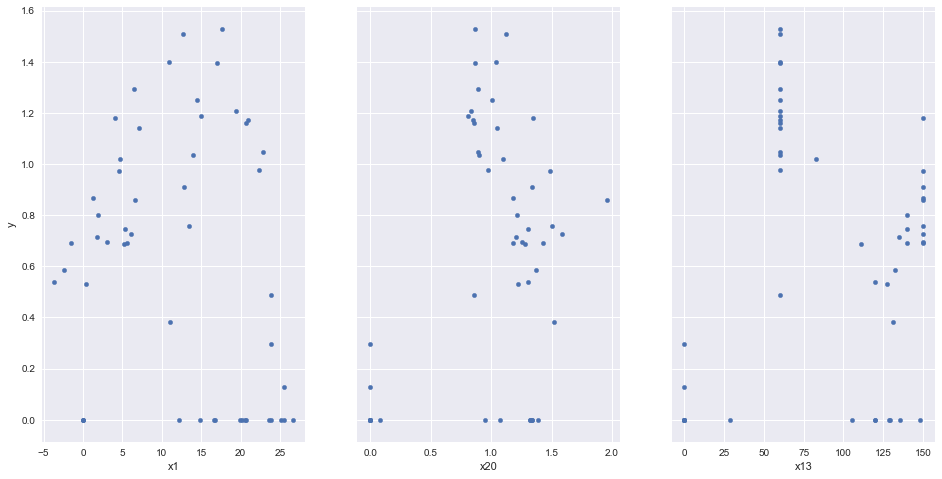

In [5]:
# Performing exploratory analysis on data by randomly plotting charts to understand data relationship and association

fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='x1', y='y', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='x20', y='y', ax=axs[1])
data.plot(kind='scatter', x='x13', y='y', ax=axs[2])

/Users/oluwatade/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111ce98d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11268df50>]], dtype=object)

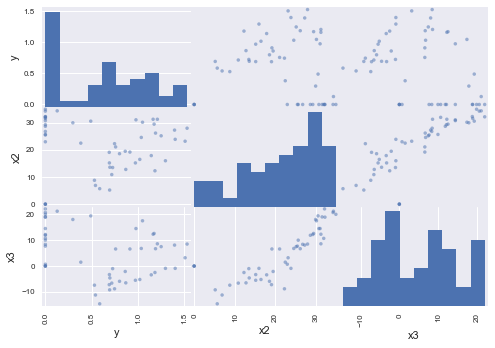

In [6]:
from pandas.tools import plotting
plotting.scatter_matrix(data[['y', 'x2', 'x3']])

#### Removing NA values and replacing them with zeros

In [7]:
# Removing NA values and replacing them with zeros
Imp_data=data.fillna(0)
Imp_data

,week,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47
0,31,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00
1,32,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00
2,33,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00
3,34,0.000000,25.157143,34.3,20.7,14285.0,26.928571,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9999.50,29.998500,0.000000,0.00
4,35,0.000000,23.828571,31.6,19.0,13683.0,25.771429,28.414286,22.528571,62.157143,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9578.10,28.734300,0.000000,0.00
5,36,0.000000,23.600000,32.3,18.9,14126.0,25.128571,27.828571,21.985714,69.385714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9888.20,29.664600,0.000000,0.00
6,37,0.000000,20.614286,28.7,11.9,13241.0,22.000000,24.828571,18.957143,66.014286,...,0.000000,0.000000,1.500000,0.000000,0.039789,0.000000,9268.70,249.348385,465.849161,0.00
7,38,0.000000,19.842857,29.3,12.2,14760.0,21.600000,24.928571,18.071429,65.614286,...,4.300000,10.810658,1.300000,2.165000,0.582286,0.000000,10332.00,3231.283162,450.320856,0.00
8,39,0.000000,20.585714,30.8,14.5,13448.0,21.585714,24.514286,18.557143,78.385714,...,8.100000,20.364263,1.125000,1.085000,2.387010,0.000000,9413.60,7791.880582,449.766273,0.00
9,40,0.000000,20.114286,32.0,10.7,12418.0,21.528571,24.171429,18.942857,73.300000,...,10.800000,27.152351,0.650000,0.675000,3.422876,0.000000,8692.60,7997.636302,447.547944,0.00


#### Creating a Panda dataframe and specifying the target column

In [8]:
import pandas_ml as pdml
df = pdml.ModelFrame(Imp_data, target='y')


In [9]:
#data_norm = (data - data.mean()) / (data.max() - data.min())
#data_norm.head()


#### Data Normalisation and Scaling

In [10]:
mu    = df.mean(axis=0) # mean of each col
sigma = df.std(axis=0)  # std dev of each col

Xnorm = (df - mu)/sigma
print Xnorm

        week         y        x1        x2        x3        x4        x5  \
0   0.296936 -1.232147 -1.362064 -2.239464 -0.486737 -2.129202 -2.324188   
1   0.362922 -1.232147 -1.362064 -2.239464 -0.486737 -2.129202 -2.324188   
2   0.428908 -1.232147 -1.362064 -2.239464 -0.486737 -2.129202 -2.324188   
3   0.494894 -1.232147  1.418878  1.305360  1.612316  0.772087  1.380080   
4   0.560880 -1.232147  1.272014  1.026322  1.439930  0.649821  1.220904   
5   0.626866 -1.232147  1.246747  1.098665  1.429790  0.739794  1.132473   
6   0.692852 -1.232147  0.916698  0.726614  0.719965  0.560050  0.702110   
7   0.758838 -1.232147  0.831422  0.788622  0.750386  0.868560  0.647087   
8   0.824824 -1.232147  0.913540  0.943644  0.983614  0.602092  0.645121   
9   0.890809 -1.232147  0.861426  1.067661  0.598281  0.392899  0.637261   
10  0.956795 -1.232147  0.493477  0.530253  0.365053  0.534460  0.495772   
11  1.022781 -1.232147  0.277129  0.395901  0.294070  0.300894  0.322840   
12  1.088767

In [11]:
import pandas_ml as pdml
dfNorm = pdml.ModelFrame(Xnorm, target='y')


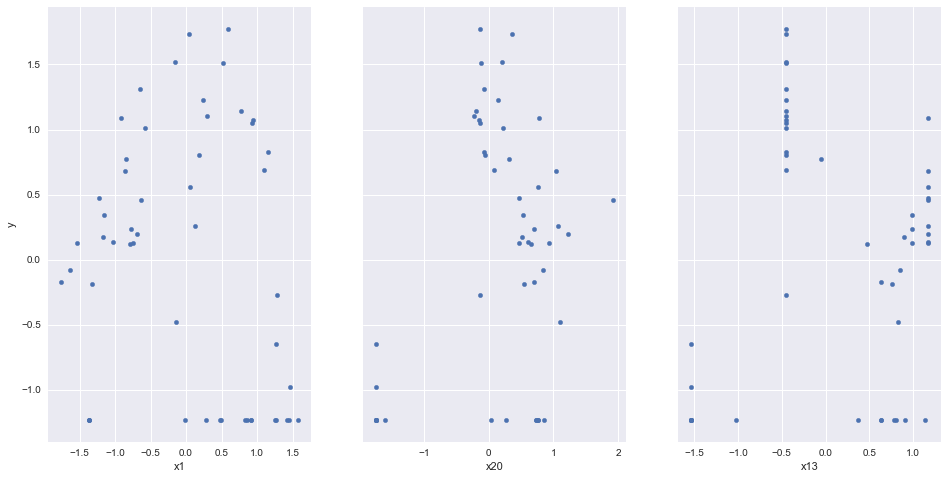

In [12]:
fig, axs = plt.subplots(1, 3, sharey=True)
Xnorm.plot(kind='scatter', x='x1', y='y', ax=axs[0], figsize=(16, 8))
Xnorm.plot(kind='scatter', x='x20', y='y', ax=axs[1])
Xnorm.plot(kind='scatter', x='x13', y='y', ax=axs[2])

(array([ 11.,   1.,   9.,   4.,   2.,   6.,   7.,   4.,   6.,   2.]),
 array([-1.4202103 , -1.09576203, -0.77131377, -0.4468655 , -0.12241723,
         0.20203104,  0.52647931,  0.85092758,  1.17537585,  1.49982412,
         1.82427239]),
 <a list of 10 Patch objects>)

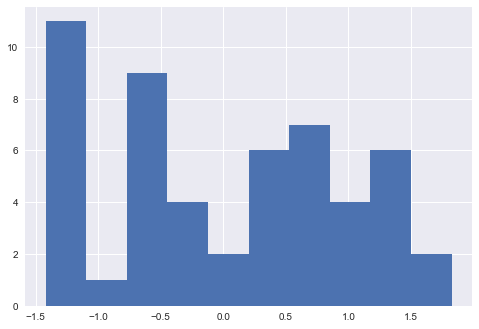

In [13]:
plt.hist(Xnorm.x21)

#### PCA dimensionality Reduction Process

In [14]:
m = len(dfNorm)
covmat = np.dot(dfNorm.T, dfNorm)/m 
print covmat


[[ 0.98076923 -0.39024423  0.32680944 ..., -0.21380126 -0.25696837
  -0.15182819]
 [-0.39024423  0.98076923 -0.19538006 ...,  0.40352736  0.66910106
   0.64255712]
 [ 0.32680944 -0.19538006  0.98076923 ..., -0.17813337 -0.31519778
  -0.24490031]
 ..., 
 [-0.21380126  0.40352736 -0.17813337 ...,  0.98076923  0.72341786
   0.28314424]
 [-0.25696837  0.66910106 -0.31519778 ...,  0.72341786  0.98076923
   0.67776284]
 [-0.15182819  0.64255712 -0.24490031 ...,  0.28314424  0.67776284
   0.98076923]]


In [15]:
covmat.shape

(49, 49)

In [16]:
S,U = np.linalg.eig(covmat)

print 'Eigen values: {}'.format(S)
print 'Eigen vectors:'
print  U 

Eigen values: [  2.49107366e+01 +0.00000000e+00j   9.43612182e+00 +0.00000000e+00j
   4.51345522e+00 +0.00000000e+00j   2.37735400e+00 +0.00000000e+00j
   1.72004435e+00 +0.00000000e+00j   1.63638129e+00 +0.00000000e+00j
   7.08009900e-01 +0.00000000e+00j   6.59625565e-01 +0.00000000e+00j
   5.25598639e-01 +0.00000000e+00j   3.50753878e-01 +0.00000000e+00j
   2.09998506e-01 +0.00000000e+00j   1.69755106e-01 +0.00000000e+00j
   1.52089395e-01 +0.00000000e+00j   1.29099018e-01 +0.00000000e+00j
   1.05272151e-01 +0.00000000e+00j   8.78165178e-02 +0.00000000e+00j
   6.72887499e-02 +0.00000000e+00j   6.03872375e-02 +0.00000000e+00j
   5.37156335e-02 +0.00000000e+00j   4.02394747e-02 +0.00000000e+00j
   3.02000309e-02 +0.00000000e+00j   2.43954313e-02 +0.00000000e+00j
   1.99886068e-02 +0.00000000e+00j   1.84301777e-02 +0.00000000e+00j
   1.33038568e-02 +0.00000000e+00j   1.11293104e-02 +0.00000000e+00j
   6.64453956e-03 +0.00000000e+00j   5.49129614e-03 +0.00000000e+00j
   3.26573156e-03 +0

In [17]:
Z = np.dot(covmat,U)

/Users/oluwatade/anaconda/envs/python2/lib/python2.7/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


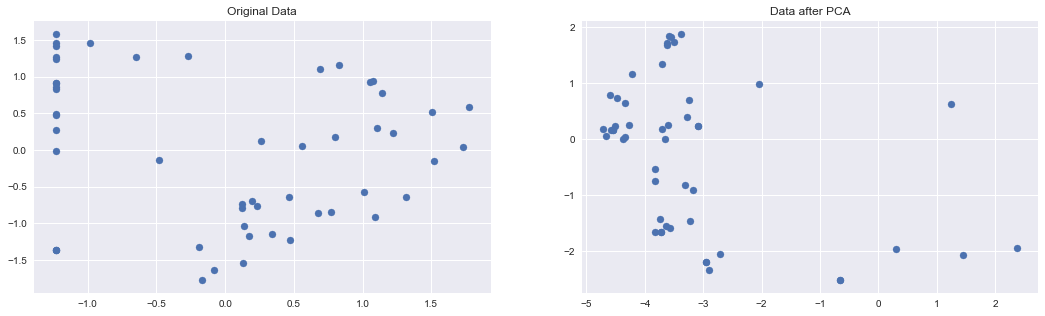

In [18]:
# 2 plots in one row
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,5))  # added size of each figs (width, height)
fig.subplots_adjust(wspace=0.2) # leave some space between figs
y = Xnorm.y
x = Xnorm.x1
 #plot for original data 
axs[0].scatter(y, x)
axs[0].set_title("Original Data")

# plot for uncorrelated data after PCA
axs[1].scatter(Z[:,0], Z[:,1])
axs[1].set_title("Data after PCA")

In [19]:
k = 1 # number of principal components to retain

Ured =  U[:,0:k] # choose the first k principal components
#project our data Xnorm onto Ured
Zred = np.dot(Xnorm,Ured) 

print Zred.shape
print Ured.shape

(52, 1)
(49, 1)


(52, 49)


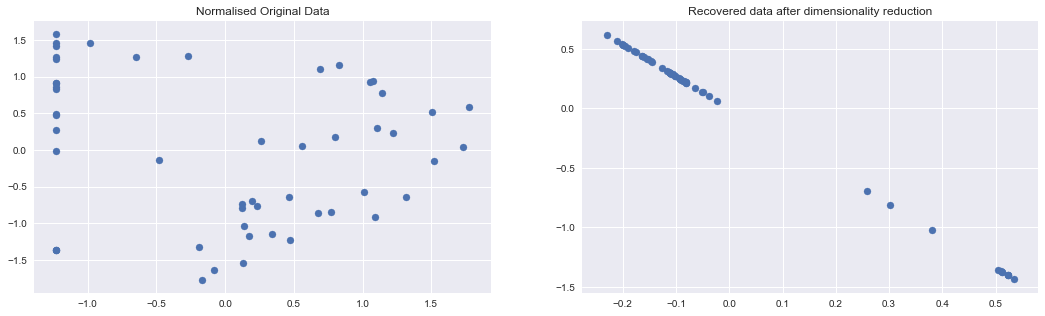

In [20]:
#recover our Xnorm data from Zred
Xrec = np.dot(Zred, Ured.T)
print Xrec.shape


y = Xnorm.y
x = Xnorm.x1
#Visualize the recovered data
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,5))  # added size of each figs (width, height)
fig.subplots_adjust(wspace=0.2) # leave some space between figs

# plot for Xnorm 
axs[0].scatter(y,x)
axs[0].set_title("Normalised Original Data")

# plot for Xrec
axs[1].scatter(Xrec[:,0], Xrec[:,1])
axs[1].set_title("Recovered data after dimensionality reduction")



In [21]:
rec_err = np.linalg.norm(Xnorm-Xrec, 'fro')/np.linalg.norm(Xnorm, 'fro')
print "The reconstruction error is: {}".format(rec_err)


The reconstruction error is: 0.694009610433


### INBUILT DIMENSIONALITY REDUCTION

In [22]:
df_= dfNorm.drop(['y'],axis=1)



In [23]:
from sklearn.preprocessing import scale
Xnorm2 = scale(df_)


In [24]:
#perform PCA using sklearn PCA implementation
from sklearn.decomposition import PCA

pca = PCA(n_components=47)
pca.fit(Xnorm2)

PCA(copy=True, iterated_power='auto', n_components=47, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
print var

[  5.20034513e-01   1.98985843e-01   9.07274353e-02   5.04140313e-02
   3.65178749e-02   3.30990718e-02   1.50172104e-02   1.38002342e-02
   1.02354384e-02   7.31853957e-03   4.33289731e-03   3.32772566e-03
   2.75519603e-03   2.68404324e-03   2.18222331e-03   1.83702361e-03
   1.34364241e-03   1.16616608e-03   9.43928735e-04   6.96870900e-04
   5.41687891e-04   5.03098209e-04   4.01317770e-04   2.83263015e-04
   2.49232395e-04   1.41457417e-04   1.18197587e-04   9.34709345e-05
   6.34728676e-05   4.75292938e-05   4.06061215e-05   3.34261573e-05
   1.87257693e-05   1.38199148e-05   1.11635273e-05   5.79648523e-06
   4.28989896e-06   3.38461752e-06   3.03872181e-06   2.45586385e-06
   6.10802786e-07   4.55167512e-08   5.86982633e-22   3.74574381e-22
   2.36378858e-23   1.85756197e-23   9.78463137e-24]


[ 52.    71.9   80.97  86.01  89.66  92.97  94.47  95.85  96.87  97.6
  98.03  98.36  98.64  98.91  99.13  99.31  99.44  99.56  99.65  99.72
  99.77  99.82  99.86  99.89  99.91  99.92  99.93  99.94  99.95  99.95
  99.95  99.95  99.95  99.95  99.95  99.95  99.95  99.95  99.95  99.95
  99.95  99.95  99.95  99.95  99.95  99.95  99.95]


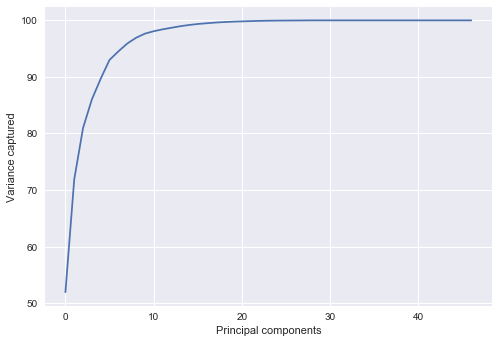

In [26]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print var1
plt.plot(var1)
plt.xlabel("Principal components")
plt.ylabel("Variance captured")

In [27]:
pca = PCA(n_components=15)
Zred = pca.fit_transform(Xnorm2)
print Zred.shape

(52, 15)


In [28]:
# Reconstruct our data
Xrec = pca.inverse_transform(Zred)
print Xrec.shape

(52, 48)


In [29]:
# Measure the reconstruction error
rec_error = np.linalg.norm(Xnorm2-Xrec, 'fro')/np.linalg.norm(Xnorm2, 'fro')
print rec_error

0.0925619928649


In [30]:
nSamples, nDims = Xnorm2.shape
# vary principal components from 1 to 5
n_comp = range(1,nDims+1)
print n_comp

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]


k=1, rec_error=0.69279541517
k=2, rec_error=0.530075130417
k=3, rec_error=0.436179101545
k=4, rec_error=0.373949431545
k=5, rec_error=0.321434756087
k=6, rec_error=0.264992887939
k=7, rec_error=0.234955357961
k=8, rec_error=0.203479203031
k=9, rec_error=0.176545596475
k=10, rec_error=0.154433830701
k=11, rec_error=0.13970293754
k=12, rec_error=0.127236728582
k=13, rec_error=0.115905086481
k=14, rec_error=0.103681945559
k=15, rec_error=0.0925619928649
k=16, rec_error=0.082040836842
k=17, rec_error=0.0733965700577
k=18, rec_error=0.0649683800911
k=19, rec_error=0.0572447523932
k=20, rec_error=0.0507945939734
k=21, rec_error=0.0451486753527
k=22, rec_error=0.0391829641179
k=23, rec_error=0.0336747220759
k=24, rec_error=0.0291671714804
k=25, rec_error=0.0245253235986
k=26, rec_error=0.0214484050728
k=27, rec_error=0.0184888207562
k=28, rec_error=0.0157596179665
k=29, rec_error=0.0135975251722
k=30, rec_error=0.0117202131824
k=31, rec_error=0.00983652761626
k=32, rec_error=0.00795808508913


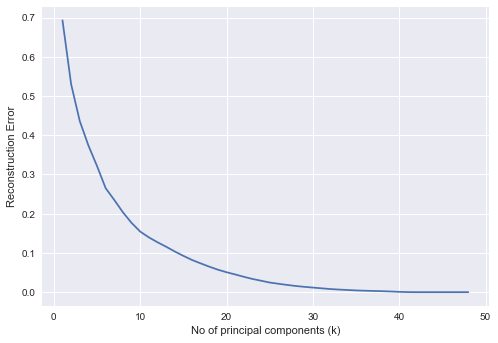

In [31]:
# Initialize vector of rec_error
rec_error = np.zeros(len(n_comp)+1)

for k in n_comp:
    pca = PCA(n_components=k)
    Zred = pca.fit_transform(Xnorm2)
    Xrec = pca.inverse_transform(Zred)
    rec_error[k] = np.linalg.norm(Xnorm2-Xrec, 'fro')/np.linalg.norm(Xnorm2, 'fro')
    print "k={}, rec_error={}".format(k, rec_error[k])

rec_error = rec_error[1:] #we started recording from index 1, so drop index 0

#Visualize the change in error
plt.plot(n_comp,rec_error)
plt.xlabel('No of principal components (k)')
plt.ylabel('Reconstruction Error')

In [32]:
i = np.identity(Xnorm2.shape[1])  # identity matrix
>>> i

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [33]:
coef = pca.transform(i)
coef

array([[  4.82942147e-02,  -6.37288787e-02,   2.45544368e-01, ...,
          4.30238838e-10,   3.90064269e-11,   1.50970387e-17],
       [  5.88429137e-02,   2.21362396e-01,   2.42737289e-01, ...,
          1.44116488e-09,   1.50456128e-09,  -5.33942941e-16],
       [  1.24914137e-02,   2.11844314e-01,   2.55105118e-01, ...,
         -3.74245332e-10,  -5.93760420e-10,   4.41637516e-16],
       ..., 
       [ -1.48360069e-01,   3.35398619e-03,   6.43460090e-02, ...,
          1.54385884e-09,   1.02153389e-09,   1.80533167e-15],
       [ -1.44552915e-01,  -2.74453816e-02,  -1.27669618e-01, ...,
         -5.73817199e-10,  -2.82435780e-10,   1.67752705e-16],
       [ -1.23681477e-01,  -2.59155797e-02,  -2.22493859e-01, ...,
         -9.33637359e-02,   9.52823848e-02,   9.77725776e-08]])

In [34]:
Zred

array([[  1.05795289e+01,  -2.06804405e+00,  -2.78259369e+00, ...,
         -2.80228975e-11,  -1.81475593e-12,   1.37520431e-16],
       [  1.05827467e+01,  -2.07229028e+00,  -2.76623315e+00, ...,
          6.44358809e-13,   7.85337258e-13,   7.19689009e-16],
       [  1.05859645e+01,  -2.07653652e+00,  -2.74987262e+00, ...,
          2.93094219e-11,   3.38424346e-12,  -7.22057899e-16],
       ..., 
       [  1.03637826e+01,   9.75940591e-01,  -8.95650087e-01, ...,
          5.30056543e-11,  -2.36745504e-11,   6.29770540e-16],
       [  1.03554830e+01,   1.12058628e+00,  -8.11862535e-01, ...,
         -4.97232454e-11,  -4.75204661e-11,  -6.78167771e-16],
       [  1.08168525e+01,   1.62309712e+00,   3.81859120e-01, ...,
          1.42887360e-12,  -6.38310837e-12,   5.00593453e-17]])

##### PCA With Linear Regression



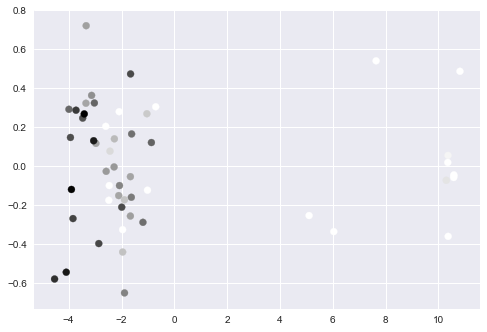

In [35]:
import pylab as pl
pl.scatter(Zred[:, 0], Zred[:, 15], c=df.target ) 

In [36]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
Xe = Zred
ye = dfNorm.target.values

Xe_train, Xe_test, ye_train, ye_test = train_test_split(Xe, ye, test_size=0.4, random_state=500)


# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(Xe_train, ye_train)
predictions = lm.predict(Xe_test)
predictions[0:50]

array([-1.4764024 ,  1.22104949,  1.10874703,  1.38489894, -0.68458477,
        2.12706704,  2.27229877,  4.21602473,  0.84644918, -2.7148482 ,
       -1.23214726, -0.22928963,  0.32891567,  1.18753333, -2.31331086,
       -0.44544969,  0.39494067, -0.14252473,  0.7491898 , -3.18587075,
        0.6906357 ])

In [37]:
ye_test

array([-1.23214726,  0.6891805 ,  1.73169774,  0.82822847, -0.19099995,
        1.14331252, -0.26977096, -1.23214726,  1.52141339, -1.23214726,
       -1.23214726,  1.01385407, -1.23214726,  1.50771408, -1.23214726,
       -1.23214726,  0.77069138,  0.56109199,  0.67753609, -1.23214726,
        0.80219979])

In [38]:
print model.fit(Xe_train, ye_train).score(Xe_test, ye_test)

-1.03076919664


In [39]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression

/Users/oluwatade/anaconda/envs/python2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [40]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [41]:
X = dfNorm.values
y = dfNorm.target.values


In [42]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=500)


##### Linear Regression


In [43]:

import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions[0:50]


array([-1.23849668,  0.70300646,  1.71550411,  0.84269914, -0.20383071,
        1.16888526, -0.20368975, -1.0905218 ,  1.50386766, -1.27069013,
       -1.23214726,  0.9815385 , -1.19156736,  1.49939097, -1.26025215,
       -1.21169702,  0.76092373,  0.54280144,  0.67939873, -1.28293438,
        0.79929967])

In [44]:
y_test

array([-1.23214726,  0.6891805 ,  1.73169774,  0.82822847, -0.19099995,
        1.14331252, -0.26977096, -1.23214726,  1.52141339, -1.23214726,
       -1.23214726,  1.01385407, -1.23214726,  1.50771408, -1.23214726,
       -1.23214726,  0.77069138,  0.56109199,  0.67753609, -1.23214726,
        0.80219979])

In [45]:
print model.fit(X_train, y_train).score(X_test, y_test)

0.998627723597


In [46]:
print lm.intercept_
print lm.coef_


0.00158687280409
[  5.73430192e-14   9.74004959e-01  -2.86445296e-03  -2.39594279e-04
   8.30304479e-03   1.99347698e-02  -2.25063512e-02  -2.61437194e-03
  -4.76013021e-02   2.91297879e-02   3.98792534e-03  -4.06733285e-03
   2.03098822e-02   1.06142046e-02   2.92222390e-02   5.20006130e-02
  -7.59996920e-03  -7.59996879e-03  -1.12731128e-02  -1.12731125e-02
   1.27125523e-02   3.30625400e-02  -2.23378981e-02   4.37047973e-02
  -5.26702246e-02  -2.90825101e-03   2.91580560e-02  -1.69322560e-03
  -1.10857101e-03  -1.30507821e-02  -2.03920970e-02  -1.46034535e-02
  -1.39308877e-02   8.13453646e-03  -8.02586361e-03  -8.72508903e-03
  -2.67708733e-03   1.93362466e-02   1.59717545e-02  -1.30787775e-02
  -1.30787775e-02   9.06413284e-03  -3.27479281e-03   3.45090395e-02
  -2.41623939e-02   1.99347698e-02  -3.28961896e-02   5.76321456e-02
  -2.41623943e-02]


#### Random Forest

In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestRegressor(n_estimators=10)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#accuracy_score(y_test, y_pred)
clf.score(X_test, y_test)

0.89762165856618836

In [48]:
y_pred

array([ 1.23407043, -0.03407439,  0.03161378,  1.15427197,  0.06825943,
        1.2148229 , -1.00658817, -1.23214726,  0.32491594, -0.11065352,
        1.14646336])

In [49]:
y_test

array([ 1.14331252,  0.25765235,  0.56109199,  1.22345347,  0.12271417,
        1.73169774, -0.64924176, -1.23214726,  0.34053315, -0.19099995,
        1.07413102])

In [50]:
import statsmodels.formula.api as smf

resfd= smf.ols('y~x4', dfNorm).fit()
print resfd.conf_int()
print resfd.pvalues

                  0         1
Intercept -0.276076  0.276076
x4        -0.086787  0.470752
Intercept    1.000000
x4           0.172734
dtype: float64


In [51]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(X_train.astype('int'), y_train.astype('int'))
clf.score(X_test.astype('int'), y_test.astype('int'))       


1.0

#### Kfold with XGboost

In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost 
import math
from __future__ import division
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score



In [53]:
from sklearn import cross_validation
from sklearn.model_selection import KFold


lm = linear_model.LinearRegression()
cv = cross_validation.KFold(len(X), n_folds=10)
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
results = []
# "Error_function" can be replaced by the error function of your analysis
for Xcv, ycv in cv:
        probas = xgb.fit(X[Xcv], y[Xcv])
        predictions = probas.predict(X[ycv])
        #results.append( Error_function )
#print "Results: " + str( np.array(results).mean() )
print model.fit(X[Xcv], y[Xcv]).score(X[ycv], y[ycv])


1.0


In [54]:
y[Xcv]

array([-1.23214726, -1.23214726, -1.23214726, -1.23214726, -1.23214726,
       -1.23214726, -1.23214726, -1.23214726, -1.23214726, -1.23214726,
       -1.23214726, -1.23214726, -1.23214726, -1.23214726, -0.48074029,
        0.25765235,  0.56109199,  0.46177201,  0.19463553,  0.126139  ,
        0.67753609,  1.09194012,  0.47341643,  0.13572852, -0.19099995,
       -0.16976602, -0.08003556,  0.13093376,  0.23504849,  0.34053315,
        0.17614147,  0.12271417,  0.77069138,  1.01385407,  1.31455386,
        1.52141339,  1.73169774,  1.22345347,  0.80219979,  1.1042695 ,
        1.77348063,  1.50771408,  1.14331252,  1.0528971 ,  1.07413102,
        0.6891805 ,  0.82822847])

In [55]:
y

array([-1.23214726, -1.23214726, -1.23214726, -1.23214726, -1.23214726,
       -1.23214726, -1.23214726, -1.23214726, -1.23214726, -1.23214726,
       -1.23214726, -1.23214726, -1.23214726, -1.23214726, -0.48074029,
        0.25765235,  0.56109199,  0.46177201,  0.19463553,  0.126139  ,
        0.67753609,  1.09194012,  0.47341643,  0.13572852, -0.19099995,
       -0.16976602, -0.08003556,  0.13093376,  0.23504849,  0.34053315,
        0.17614147,  0.12271417,  0.77069138,  1.01385407,  1.31455386,
        1.52141339,  1.73169774,  1.22345347,  0.80219979,  1.1042695 ,
        1.77348063,  1.50771408,  1.14331252,  1.0528971 ,  1.07413102,
        0.6891805 ,  0.82822847, -0.26977096, -0.64924176, -0.98144994,
       -1.23214726, -1.23214726])

#### Xgboost

In [56]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [57]:
traindf, testdf = train_test_split(X_train, test_size = 0.3)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.08, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.75)

In [58]:
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.993339024832


In [59]:
predictions

array([ 1.09686017,  0.23602164,  0.48851192,  1.26514804,  0.13714048,
        1.62457001, -0.49081886, -1.23135245,  0.31493908, -0.18290329,
        1.05470967], dtype=float32)

In [60]:
y_test

array([ 1.14331252,  0.25765235,  0.56109199,  1.22345347,  0.12271417,
        1.73169774, -0.64924176, -1.23214726,  0.34053315, -0.19099995,
        1.07413102])

### Feature Selection With Lasso

# X = df_.values
y = dfNorm.target.values

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
names = df_.columns
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoLarsCV
# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(X,y)

# print variable names and regression coefficients
dict(zip(names, model.coef_))


In [62]:
rsquared_train=model.score(X_train,y_train)
rsquared_test=model.score(X_test,y_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.843337190357
test data R-square
0.83232608376


### Randomised LASSO

In [63]:
#*************************************************L1 Regularization*************************************************#
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import RandomizedLasso

# For L1 regularization, alpha is given as 0.025
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

rlasso = RandomizedLasso(alpha=0.025)
rlasso.fit(X_train, y_train)
names = df_.columns

#Now, we'll  be checking for the classification accuracy

print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 6), rlasso.scores_),   
                 names), reverse=True)

Features sorted by their score:
[(0.595, 'x37'), (0.455, 'x28'), (0.45, 'x43'), (0.26, 'x39'), (0.225, 'x47'), (0.21, 'x46'), (0.195, 'x34'), (0.175, 'x35'), (0.15, 'x38'), (0.095, 'x36'), (0.045, 'x26'), (0.03, 'week'), (0.025, 'x3'), (0.025, 'x11'), (0.015, 'x1'), (0.01, 'x24'), (0.01, 'x14'), (0.005, 'x40'), (0.005, 'x31'), (0.005, 'x27'), (0.005, 'x18'), (0.005, 'x12'), (0.0, 'x9'), (0.0, 'x8'), (0.0, 'x7'), (0.0, 'x6'), (0.0, 'x5'), (0.0, 'x45'), (0.0, 'x44'), (0.0, 'x42'), (0.0, 'x41'), (0.0, 'x4'), (0.0, 'x33'), (0.0, 'x32'), (0.0, 'x30'), (0.0, 'x29'), (0.0, 'x25'), (0.0, 'x23'), (0.0, 'x22'), (0.0, 'x21'), (0.0, 'x20'), (0.0, 'x2'), (0.0, 'x19'), (0.0, 'x17'), (0.0, 'x16'), (0.0, 'x15'), (0.0, 'x13'), (0.0, 'x10')]


In [64]:
rlasso.fit(X, y)

RandomizedLasso(alpha=0.025, eps=2.2204460492503131e-16, fit_intercept=True,
        max_iter=500, memory=Memory(cachedir=None), n_jobs=1,
        n_resampling=200, normalize=True, pre_dispatch='3*n_jobs',
        precompute='auto', random_state=None, sample_fraction=0.75,
        scaling=0.5, selection_threshold=0.25, verbose=False)

In [65]:
from sklearn.feature_selection import RFE
rfe = RFE(lm, n_features_to_select=17)
modell=rfe.fit(X,y)
pred=rfe.predict(X_test)


In [66]:
pred

array([ 1.27556415,  0.18065293, -1.15356692,  1.41646568,  0.30758103,
        0.46326258,  1.31963504,  1.25047556,  1.0497787 ,  0.40513163,
        0.40002053,  0.79659393,  1.53710486, -1.34781487,  0.71933395,
        0.15668848,  0.98105134, -0.74807427, -0.88608312,  0.15010898,
        0.5306546 ])

In [67]:
y_test

array([ 1.52141339,  0.13572852, -1.23214726,  1.31455386,  0.67753609,
        0.126139  ,  1.73169774,  1.14331252,  1.22345347,  0.34053315,
        0.23504849,  1.01385407,  1.77348063, -1.23214726,  0.46177201,
       -0.19099995,  1.0528971 , -1.23214726, -1.23214726,  0.56109199,
        0.12271417])

In [68]:
Model_acc_train= (modell.fit(X_train, y_train).score(X_test, y_test))

In [69]:
Model_acc_train

0.33998053543537143